In [19]:


import numpy as np
from matplotlib import pyplot as plt

import cv2

img=cv2.imread('C:/Users/13775/Documents/computer vision/cas.jpg',0)

#读取图像，cv2.imshow的展示方式

cv2.imshow('cas',img)
cv2.waitKey(0)
'''
cv2.imshow('cas',img)
key = cv2.waitKey()

if key == 27:

    cv2.destroyAllWindows()
    ESC键让图片显示
'''

"\ncv2.imshow('cas',img)\nkey = cv2.waitKey()\n\nif key == 27:\n\n    cv2.destroyAllWindows()\n    ESC键让图片显示\n"

In [20]:
#打印图片数据类型以及尺寸

print(img.dtype)
print(img.shape)  #h,w

uint8
(400, 600)


In [21]:
#图像裁剪
img_crop=img[50:350,100:500]
cv2.imshow('cas_crop',img_crop)
cv2.waitKey(0)

-1

In [28]:
#change color in YUV space
imgc=cv2.imread('C:/Users/13775/Documents/computer vision/cas.jpg',1)
B, G, R = cv2.split(imgc)

img_ycrcb = cv2.cvtColor(imgc,cv2.COLOR_BGR2YCrCb)
save_path='C:/Users/13775/Documents/computer vision/'+'ycrcb'+'.jpg'
cv2.imwrite(save_path, img_ycrcb)

plt.imshow(img_ycrcb)

True

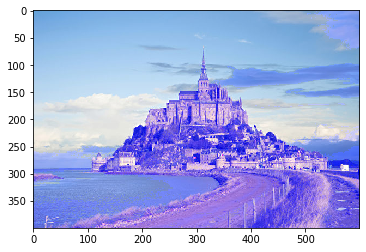

In [32]:
#change color in RGB space
imgc=cv2.imread('C:/Users/13775/Documents/computer vision/cas.jpg',1)
B, G, R = cv2.split(imgc)
for i in range(256):
    B[B<=200]= B[B<=200]+50
    B[B>200]= B[B>200]
imgblue=cv2.merge((R,G,B))
plt.imshow(imgblue)    

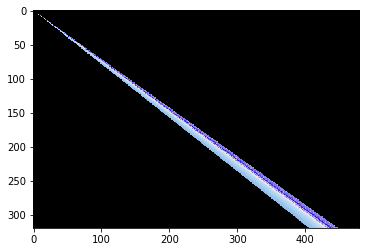

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


#data agumentation script


def agu(img,const,angle,scale):
    #crop
    heightmini=img.shape[0]//10
    widthmini=img.shape[1]//10
    img_crop=img[heightmini:img.shape[0]-heightmini,widthmini:img.shape[1]-widthmini]
    #color shift
    B, G, R = cv2.split(img_crop)
    for i in range(256):
        B[B<=200]= B[B<=200]+const
        B[B>200]= B[B>200]
    img_blue=cv2.merge((R,G,B))
    #rotation
    M1=cv2.getRotationMatrix2D((img_blue.shape[1]//2,img_blue.shape[0]//2),angle,scale)
    img_rotate=cv2.warpAffine(img_blue,M1,(img_blue.shape[1],img_blue.shape[0]))
    #perspective transform
    x1=x3=img_rotate.shape[1]*0.3
    x2=x4=img_rotate.shape[1]*0.7
    dx1=dx3=img_rotate.shape[1]*0.35
    dx2=dx4=img_rotate.shape[1]*0.8
    y1=y3=img_rotate.shape[0]*0.5
    y2=y4=img_rotate.shape[0]*0.9
    dy1=dy3=img_rotate.shape[0]*0.4
    dy2=dy4=img_rotate.shape[0]*0.85
    pts1=np.float32([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])
    pts2=np.float32([[dx1,dy1],[dx2,dy2],[dx3,dy3],[dx4,dy4]])
    M2=cv2.getPerspectiveTransform(pts1,pts2)
    imgwarp=cv2.warpPerspective(img_rotate,M2,(img_rotate.shape[1],img_rotate.shape[0]))
    plt.imshow(imgwarp)
imgtest=cv2.imread('C:/Users/13775/Documents/computer vision/cas.jpg',1)
agu(imgtest,50,45,0.7)
    
 
    